In [1]:
import pandas as pd
import numpy as np

from tqdm import tqdm
import seaborn as sns

%matplotlib inline

In [2]:
gene_symbols_path = "/home/nanni/Data/TCGA/CIBB/gene_symbols.tsv"
idx_to_gene_symbol = pd.read_csv(gene_symbols_path, sep="\t", index_col=0, squeeze=True)
gene_symbol_to_idx = pd.Series(data=idx_to_gene_symbol.index, index=idx_to_gene_symbol.values)

## Ontological matrix

In [3]:
dm_path = "/home/nanni/Data/TCGA/CIBB/distances.csv"
dm = pd.read_csv(dm_path, sep="\t")

In [4]:
symbols = dm.as_matrix(['symbol1', 'symbol2'])
distances = dm.min_distance.values

In [5]:
distance_matrix = np.full(shape=(idx_to_gene_symbol.shape[0], idx_to_gene_symbol.shape[0]), fill_value=np.inf)
for i in tqdm(range(symbols.shape[0])):
    symbol1_i, symbol2_i = symbols[i, 0], symbols[i, 1]
    distance_i = distances[i]
    symbol1_idx_i, symbol2_idx_i = gene_symbol_to_idx[symbol1_i], gene_symbol_to_idx[symbol2_i]
    distance_matrix[symbol1_idx_i, symbol2_idx_i] = distance_i
    distance_matrix[symbol2_idx_i, symbol1_idx_i] = distance_i

100%|██████████| 132287049/132287049 [36:57<00:00, 59665.52it/s]


In [6]:
np.fill_diagonal(distance_matrix, val=0)

In [7]:
np.save("/home/nanni/Data/TCGA/CIBB/ontological_distance_matrix.npy", distance_matrix)

In [2]:
distance_matrix = np.load("/home/nanni/Data/TCGA/CIBB/ontological_distance_matrix.npy")

### MDS

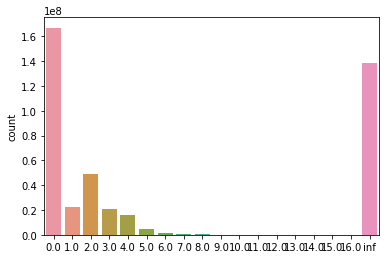

In [15]:
sns.countplot(distance_matrix.flatten())

In [11]:
distance_matrix.shape

(20530, 20530)